# Neural Networks

In [1]:
# standard imports
import matplotlib.pyplot as plt
import numpy as np
import random

# sklearn data
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.datasets import make_classification
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# sklearn models
from sklearn.ensemble import RandomForestClassifier

# sklearn metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

# pytorch imports
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

## Torch Setup

In [2]:
# get cpu, gpu or mps device for training
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

print(f"Using {device} device!")

Using mps device!


If your machine does not allow for `mps` or `cuda` consider using:

- [Google Colaboratory](https://colab.google/)
    - Be sure to change the runtime type to a GPU.
- [Illinois Computes Research Notebooks](https://jupyter.ncsa.illinois.edu/hub/)
    - Be sure to select the PyTorch option to utilize a GPU.

## Logistic Regression as a Neural Network: Linear Data

In [3]:
# generate "linear" data
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=2,
    n_classes=2,
)

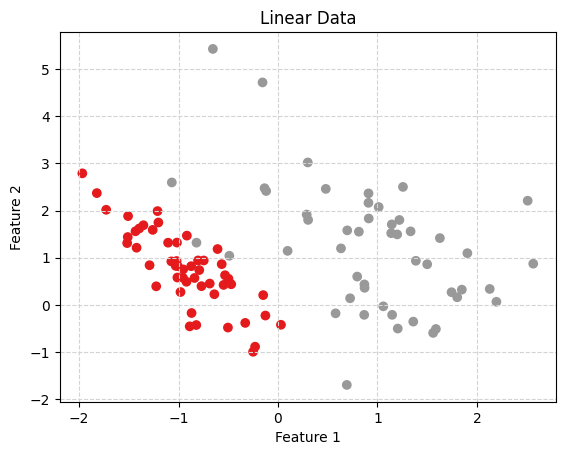

In [4]:
# create a new figure and an axes
fig, ax = plt.subplots()

# plot the generated data
scatter = ax.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    cmap=plt.cm.Set1,
)

# set labels and title
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_title("Linear Data")

# add a grid
ax.grid(
    color="lightgrey",
    linestyle="--",
)

# display the plot
plt.show()

In [5]:
# define a logistic regression model class
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.linear = nn.Linear(input_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

In [6]:
# create the model instance
input_size = X.shape[1]
model = LogisticRegression(input_size)
print(model)

LogisticRegression(
  (linear): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [7]:
# define the loss function
loss_fn = nn.BCELoss()

# define the optimizer
optimizer = torch.optim.SGD(
    model.parameters(),
    lr=0.01,
)

# convert the data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# train the model
num_epochs = 1000
for epoch in range(num_epochs):

    # forward pass
    outputs = model(X_tensor)
    loss = loss_fn(outputs, y_tensor.view(-1, 1))

    # backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# print the trained model parameters
print("Trained model parameters:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

Trained model parameters:
linear.weight tensor([[1.8135, 0.6244]])
linear.bias tensor([-0.4338])


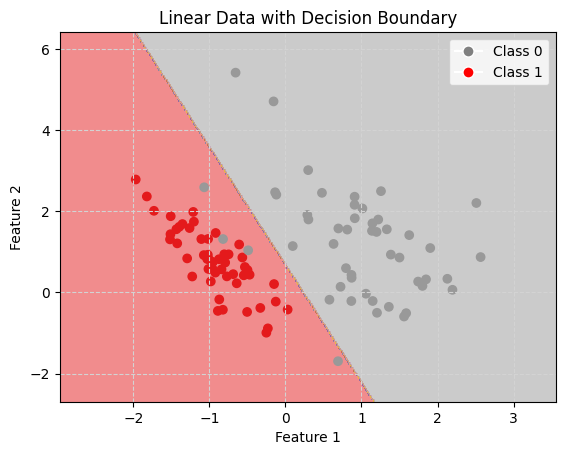

In [8]:
# generate a grid of points
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02),
)
grid_points = np.c_[xx.ravel(), yy.ravel()]

# convert the grid points to PyTorch tensor
grid_tensor = torch.tensor(grid_points, dtype=torch.float32)

# use the trained model to predict the class labels for the grid points
with torch.no_grad():
    predictions = model(grid_tensor)
    labels = (predictions >= 0.5).float().numpy().reshape(xx.shape)

# create a new figure and an axes
fig, ax = plt.subplots()

# plot the decision boundary
ax.contourf(xx, yy, labels, alpha=0.5, cmap=plt.cm.Set1)

# plot the generated data
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)

# set labels and title
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_title("Linear Data with Decision Boundary")

# add a legend
legend_elements = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label="Class 0",
        markerfacecolor="grey",
        markersize=8,
    ),
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label="Class 1",
        markerfacecolor="r",
        markersize=8,
    ),
]
ax.legend(handles=legend_elements)

# add a grid
ax.grid(color="lightgrey", linestyle="--")

# display the plot
plt.show()

## Logistic Regression as a Neural Network: Circle Data

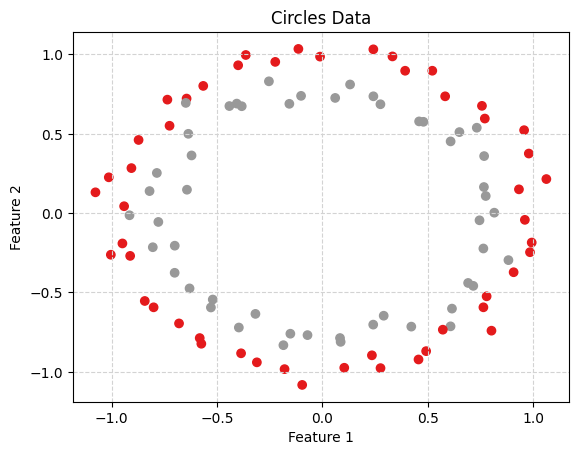

In [9]:
# generate circles data
X, y = make_circles(
    n_samples=100,
    noise=0.05,
    random_state=42,
)

# plot the generated data
fig, ax = plt.subplots()
scatter = ax.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    cmap=plt.cm.Set1,
)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_title("Circles Data")
ax.grid(color="lightgrey", linestyle="--")
plt.show()

In [10]:
# create the model instance
input_size = X.shape[1]
model = LogisticRegression(input_size)
print(model)

# define the loss function
criterion = nn.BCELoss()

# define the optimizer
optimizer = torch.optim.SGD(
    model.parameters(),
    lr=0.01,
)

# convert the data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# train the model
num_epochs = 1000
for epoch in range(num_epochs):

    # forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor.view(-1, 1))

    # backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# print the trained model parameters
print("Trained model parameters:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

LogisticRegression(
  (linear): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Trained model parameters:
linear.weight tensor([[ 0.0450, -0.2437]])
linear.bias tensor([-0.0047])


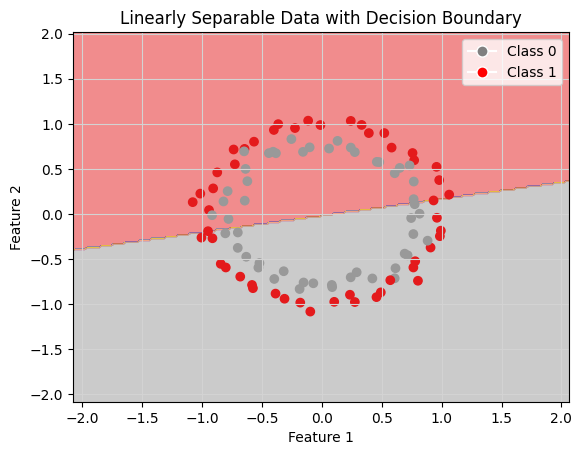

In [11]:
# generate a grid of points
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02),
)
grid_points = np.c_[xx.ravel(), yy.ravel()]

# convert the grid points to PyTorch tensor
grid_tensor = torch.tensor(grid_points, dtype=torch.float32)

# use the trained model to predict the class labels for the grid points
with torch.no_grad():
    predictions = model(grid_tensor)
    labels = (predictions >= 0.5).float().numpy().reshape(xx.shape)

# create a new figure and an axes
fig, ax = plt.subplots()

# plot the decision boundary
ax.contourf(xx, yy, labels, alpha=0.5, cmap=plt.cm.Set1)

# plot the generated data
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)

# set labels and title
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_title("Linearly Separable Data with Decision Boundary")

# add a legend
legend_elements = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label="Class 0",
        markerfacecolor="grey",
        markersize=8,
    ),
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label="Class 1",
        markerfacecolor="r",
        markersize=8,
    ),
]
ax.legend(handles=legend_elements)

# add a grid
ax.grid(True, color="lightgrey")

# display the plot
plt.show()

## Multi-Layer Neural Network: Circle Data

In [12]:
# define multi-layer neural network class
class MLP(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.linear = nn.Sequential(
            nn.Linear(input_size, 100),
            nn.ReLU(),
            nn.Linear(100, 10),
            nn.ReLU(),
            nn.Linear(10, 1),
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out


# create the model instance
input_size = X.shape[1]
model = MLP(input_size)
print(model)

# define the loss function
criterion = nn.BCELoss()

# define the optimizer
optimizer = torch.optim.SGD(
    model.parameters(),
    lr=0.1,
)

# convert the data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor.view(-1, 1))

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# print the trained model parameters
print("Trained model parameters:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
  (sigmoid): Sigmoid()
)
Trained model parameters:
linear.0.weight tensor([[-0.8696,  0.2473],
        [ 0.1275, -0.0138],
        [ 0.8971, -0.8813],
        [ 0.1107, -0.3370],
        [-0.5101, -0.6369],
        [-0.4097, -0.9495],
        [ 0.8355, -0.0440],
        [-0.4884,  0.2863],
        [-0.3895, -0.0334],
        [-0.3209, -0.6127],
        [ 0.8833, -0.7929],
        [-0.5545,  0.8350],
        [-0.0221,  0.7725],
        [ 0.3406, -0.4200],
        [ 0.0556,  0.3566],
        [ 0.1965, -0.6407],
        [-0.0090, -0.3468],
        [-0.1664,  0.3121],
        [-0.4747, -0.5941],
        [-0.6349, -0.0413],
        [ 0.2495,  0.2714],
        [-0.6767, -0.7082],
        [-0.4162,  0.7766],
        [-0.6059, -0.3137],
        [ 0.8206

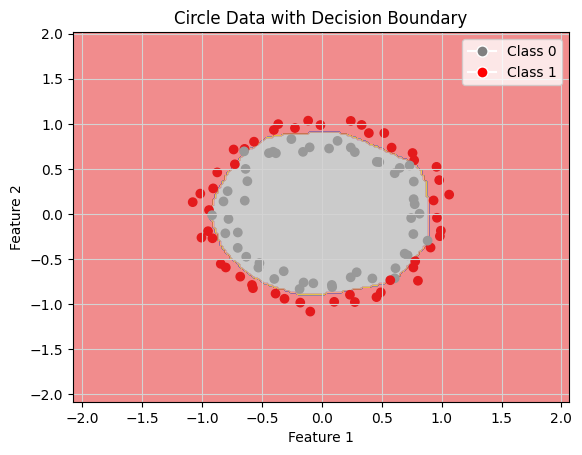

In [13]:
# generate a grid of points
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02),
)
grid_points = np.c_[xx.ravel(), yy.ravel()]

# convert the grid points to PyTorch tensor
grid_tensor = torch.tensor(grid_points, dtype=torch.float32)

# use the trained model to predict the class labels for the grid points
with torch.no_grad():
    predictions = model(grid_tensor)
    labels = (predictions >= 0.5).float().numpy().reshape(xx.shape)

# create a new figure and an axes
fig, ax = plt.subplots()

# plot the decision boundary
ax.contourf(xx, yy, labels, alpha=0.5, cmap=plt.cm.Set1)

# plot the generated data
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)

# set labels and title
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_title("Circle Data with Decision Boundary")

# add a legend
legend_elements = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label="Class 0",
        markerfacecolor="grey",
        markersize=8,
    ),
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label="Class 1",
        markerfacecolor="r",
        markersize=8,
    ),
]
ax.legend(handles=legend_elements)

# add a grid
ax.grid(True, color="lightgrey")

# display the plot
plt.show()

## Multi-Layer Neural Network: Five Class Data

In [14]:
# generate the dataset
X, y = make_blobs(
    n_samples=1000,
    centers=5,
    random_state=42,
)

# print the shape of the dataset
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1000, 2)
Shape of y: (1000,)


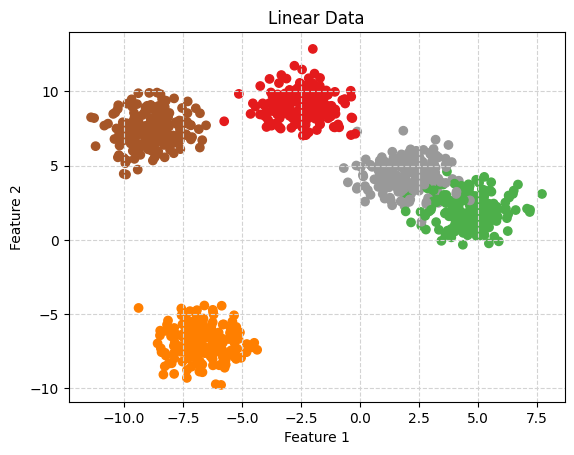

In [15]:
# create a new figure and an axes
fig, ax = plt.subplots()

# plot the generated data
scatter = ax.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    cmap=plt.cm.Set1,
)

# set labels and title
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_title("Linear Data")

# add a grid
ax.grid(color="lightgrey", linestyle="--")

# display the plot
plt.show()

In [16]:
# check target data
y[:15]

array([1, 1, 2, 1, 4, 2, 3, 4, 1, 4, 4, 2, 3, 2, 3])

In [17]:
# define multi-layer neural network class
class MLP(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.linear = nn.Sequential(
            nn.Linear(input_size, 100),
            nn.ReLU(),
            nn.Linear(100, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 5),
        )

    def forward(self, x):
        out = self.linear(x)
        return out


# create the model instance
input_size = X.shape[1]
model = MLP(input_size)
print(model)

# define the loss function
criterion = nn.CrossEntropyLoss()

# define the optimizer
optimizer = torch.optim.Adam(
    model.parameters(),
    lr=0.01,
)

# convert the data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# train the model
num_epochs = 1000
for epoch in range(num_epochs):

    # forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# print the trained model parameters
print("Trained model parameters:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=5, bias=True)
  )
)
Trained model parameters:
linear.0.weight tensor([[-0.8071,  1.3578],
        [-1.0177,  0.0976],
        [-0.2758, -0.8465],
        [ 0.1757, -0.6227],
        [-0.9746,  0.6237],
        [-0.5457,  0.9139],
        [ 0.6166,  0.0638],
        [-0.8212,  1.1222],
        [ 0.7946,  0.0126],
        [-0.2101,  1.1266],
        [-0.3024, -0.3643],
        [-0.2235,  1.2947],
        [-0.2632, -0.7824],
        [ 0.3786,  0.4665],
        [-0.0508, -0.5372],
        [ 0.6462, -0.4317],
        [ 0.2321,  0.7659],
        [ 1.0735, -0.3094],
        [-0.9262,  0.6355],
        [-0.3343, -0.6276],
        [-0.5651, -0.8120],
        [ 1.7906,  0.0709],
        [-0.2551, -

In [18]:
# convert the model predictions to numpy array
with torch.no_grad():
    predictions = model(X_tensor)
    predicted_labels = torch.argmax(predictions, dim=1).numpy()

# calculate the accuracy
accuracy = accuracy_score(y, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.98


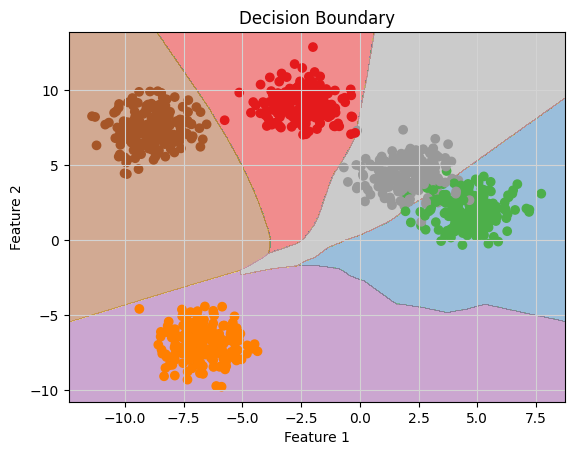

In [19]:
# generate a grid of points
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02),
)
grid_points = np.c_[
    xx.ravel(),
    yy.ravel(),
]

# convert the grid points to PyTorch tensor
grid_tensor = torch.tensor(grid_points, dtype=torch.float32)

# use the trained model to predict the class labels for the grid points
with torch.no_grad():
    predictions = model(grid_tensor)
    labels = torch.argmax(predictions, dim=1).numpy().reshape(xx.shape)

# create a new figure and an axes
fig, ax = plt.subplots()

# plot the decision boundary
ax.contourf(
    xx,
    yy,
    labels,
    alpha=0.5,
    cmap=plt.cm.Set1,
)

# plot the generated data
scatter = ax.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    cmap=plt.cm.Set1,
)

# set labels and title
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_title("Decision Boundary")

# add a grid
ax.grid(True, color="lightgrey")

# display the plot
plt.show()

## MNIST with Random Forest

- [**Wikipedia**: MNIST](https://en.m.wikipedia.org/wiki/MNIST_database)
- [**Chris Albon**: MNIST Dataset](https://chrisalbon.com/Data/MNIST+Dataset)
- [**Yann Lecun**: MNIST](http://yann.lecun.com/exdb/mnist/index.html)
- [`sklearn.datasets.load_digits`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)

In [20]:
# load 8x8 digits data from sklearn, not MNIST, but similar
# smaller images will allow for faster training
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [21]:
# check an example digit
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [22]:
# check target data
digits.target

array([0, 1, 2, ..., 8, 9, 8])

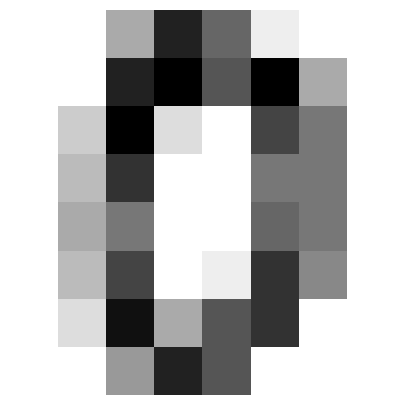

In [23]:
# plot an example digit
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(5, 5),
)
ax.set_axis_off()
ax.imshow(
    digits.images[0],
    cmap=plt.cm.gray_r,
)
plt.show()

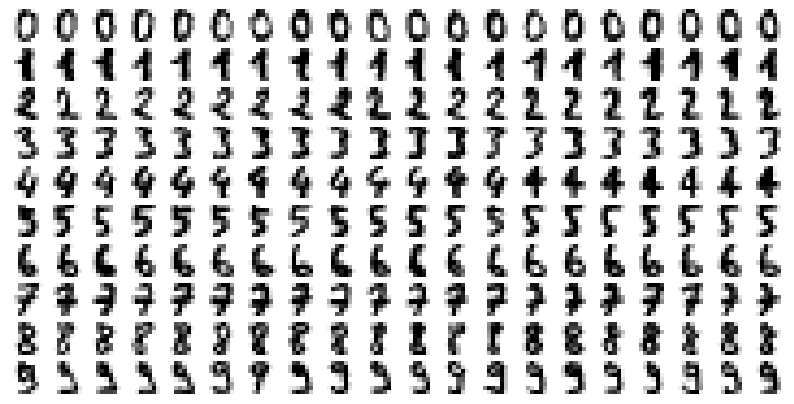

In [24]:
# plot 20 examples of each possible digit
fig, axes = plt.subplots(
    nrows=10,
    ncols=20,
    figsize=(10, 5),
)
for i in range(10):
    digit_examples = digits.images[digits.target == i]
    for j in range(20):
        axes[i][j].set_axis_off()
        axes[i][j].imshow(
            digit_examples[j],
            cmap=plt.cm.gray_r,
        )
plt.show()

In [25]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [26]:
# create a classifier: a random forest classifier
clf = RandomForestClassifier()

In [27]:
# split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data,
    digits.target,
    test_size=0.5,
    random_state=1,
)

# learn the digits on the train subset
clf.fit(X_train, y_train)

# predict the value of the digit on the test subset
predicted = clf.predict(X_test)

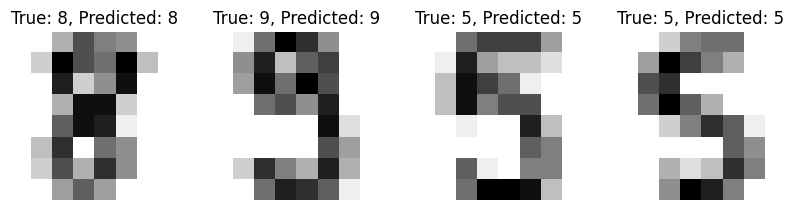

In [28]:
# get indexes for subset of training data
n_test = len(predicted)
idx = random.sample(range(0, n_test), 4)

# plot digits for test data sample with predicted and actual labels
_, axes = plt.subplots(
    nrows=1,
    ncols=4,
    figsize=(10, 3),
)
for ax, image, true_label, predicted_label in zip(
    axes,
    X_test[idx],
    y_test[idx],
    predicted[idx],
):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(f"True: {true_label}, Predicted: {predicted_label}")

Confusion matrix:
[[ 81   0   0   0   2   0   0   0   0   0]
 [  0  92   0   0   0   1   0   0   0   0]
 [  0   1  84   0   0   0   0   0   0   0]
 [  0   1   0  93   0   0   0   3   1   0]
 [  0   0   0   0 100   0   0   0   0   0]
 [  0   0   0   0   1  79   0   0   1   0]
 [  0   0   1   0   0   0  87   0   0   0]
 [  0   0   0   0   0   0   0  88   0   1]
 [  0   1   1   0   0   0   0   0  78   1]
 [  0   2   0   2   0   1   0   3   2  91]]


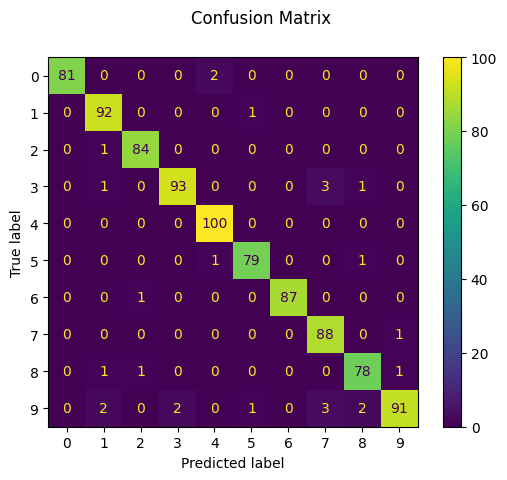

In [29]:
# calculate and display (as array and plot) a test confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

In [30]:
# calculate test accuracy
accuracy = accuracy_score(y_test, predicted)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.9710789766407119


## MNIST with a Neural Network

In [31]:
# download training data
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# download test data
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [32]:
# check train data
training_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [33]:
# define batch size
batch_size = 64

# create train data loader
train_dataloader = DataLoader(
    training_data,
    batch_size=batch_size,
)

# create test data loader
test_dataloader = DataLoader(
    test_data,
    batch_size=batch_size,
)

# check data shapes
for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [34]:
# get cpu, gpu or mps device for training
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

print(f"Using {device} device for training!")

Using mps device for training!


In [35]:
# define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


# send model to compute device
model = NeuralNetwork().to(device)

# check model structure
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [36]:
# define loss function
loss_fn = nn.CrossEntropyLoss()

# define optimizer, try different learning rates!!
optimizer = torch.optim.SGD(
    model.parameters(),
    lr=0.1,
)

In [37]:
# define train loop
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [38]:
# define test loop
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
# train model
epochs = 15
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.305160  [   64/60000]
loss: 0.657127  [ 6464/60000]
loss: 0.370948  [12864/60000]
loss: 0.389968  [19264/60000]
loss: 0.255947  [25664/60000]
loss: 0.321643  [32064/60000]
loss: 0.217182  [38464/60000]
loss: 0.298964  [44864/60000]
loss: 0.274436  [51264/60000]
loss: 0.279231  [57664/60000]
Test Error: 
 Accuracy: 93.6%, Avg loss: 0.215658 

Epoch 2
-------------------------------
loss: 0.116340  [   64/60000]
loss: 0.176405  [ 6464/60000]
loss: 0.127225  [12864/60000]
loss: 0.276288  [19264/60000]
loss: 0.112126  [25664/60000]
loss: 0.230901  [32064/60000]
loss: 0.115500  [38464/60000]
loss: 0.241277  [44864/60000]
loss: 0.184967  [51264/60000]
loss: 0.189182  [57664/60000]
Test Error: 
 Accuracy: 95.5%, Avg loss: 0.144705 

Epoch 3
-------------------------------
loss: 0.069545  [   64/60000]
loss: 0.115334  [ 6464/60000]
loss: 0.102970  [12864/60000]
loss: 0.184234  [19264/60000]
loss: 0.070404  [25664/60000]
loss: 0.158149  [32064/600

In [40]:
# convert to TorchScript
model_scripted = torch.jit.script(model)
# write to disk
model_scripted.save("model.pt")

In [ ]:
# get a batch of training data
batch = next(iter(train_dataloader))
images, labels = batch

# plot the first three images in the batch
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
for i in range(3):
    axs[i].set_axis_off()
    axs[i].imshow(images[i].squeeze(), cmap=plt.cm.gray_r)
    axs[i].set_title(f"Label: {labels[i]}")
plt.show()

In [ ]:
# get indexes for subset of training data
n_test = len(test_data)
idx = random.sample(range(0, n_test), 10)

# plot digits for test data sample with predicted and actual labels
_, axes = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(10, 3),
)
for ax, idx in zip(axes, idx):
    image, label = test_data[idx]
    image = image.unsqueeze(0)
    with torch.no_grad():
        model.eval()
        output = model(image.to(device))
        predicted = output.argmax(1).item()
    ax.set_axis_off()
    image = image.squeeze()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(f"True: {label}, Predicted: {predicted}")
plt.show()

## KMNIST

- [`rois-codh/kmnist`](https://github.com/rois-codh/kmnist)
- [`torchvision.datasets.KMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.KMNIST.html)

In [43]:
# download training data
training_data = datasets.KMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# download test data
test_data = datasets.KMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [44]:
# define batch size
batch_size = 64

# create train data loader
train_dataloader = DataLoader(
    training_data,
    batch_size=batch_size,
)

# create test data loader
test_dataloader = DataLoader(
    test_data,
    batch_size=batch_size,
)

In [ ]:
# check data shapes
for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

In [ ]:
# Get a batch of training data
batch = next(iter(train_dataloader))
images, labels = batch

# Plot the first batch of images
fig, axs = plt.subplots(8, 8, figsize=(10, 10))
for i in range(8):
    for j in range(8):
        axs[i, j].set_axis_off()
        axs[i, j].imshow(images[i * 8 + j].squeeze(), cmap=plt.cm.gray_r)
plt.show()

In [ ]:
# get cpu, gpu or mps device for training
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

print(f"Using {device} device for training!")

In [ ]:
# define nn model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


model_nn = NeuralNetwork().to(device)
print(model_nn)

In [ ]:
# define cnn model
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_stack = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 10),
        )

    def forward(self, x):
        logits = self.conv_stack(x)
        return logits


model_cnn = ConvNet().to(device)
print(model_cnn)

In [50]:
# define loss function
loss_fn = nn.CrossEntropyLoss()

# define nn optimizer
optimizer_nn = torch.optim.SGD(
    model_nn.parameters(),
    lr=1e-3,
)

# define cnn optimizer
optimizer_cnn = torch.optim.Adam(
    model_cnn.parameters(),
    lr=0.001,
)

In [51]:
# define train loop
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [52]:
# define test loop
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
# train model
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model_nn, loss_fn, optimizer_nn)
    test(test_dataloader, model_nn, loss_fn)
print("Done!")

In [ ]:
# train model
epochs = 15
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model_cnn, loss_fn, optimizer_cnn)
    test(test_dataloader, model_cnn, loss_fn)
print("Done!")

In [55]:
# convert the neural network to TorchScript
model_scripted = torch.jit.script(model_nn)
# write to disk
model_scripted.save("model_nn.pt")

# convert the convolutional neural network to TorchScript
model_scripted = torch.jit.script(model_cnn)
# write to disk
model_scripted.save("model_cnn.pt")